This is the second example about diffusion. In this one, we will show that diffusion, coupled with degradation and non-uniform synthesis, can result in concentration gradients.

The code for this example is mostly identical to that of the previous example, therefore we will only explain the parts that differ from the previous example.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

# Problem definition

## Simulation and tissue structure

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 1, 1, 1e-3)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.08 s)


## Biological species

In [4]:
sim.register_cell_variable("a")

## Constants

In this example, we introduce three additional constants. *mu_a* is the degradation rate and *A* is the synthesis rate of *a*. *s* is a vector defining which cells do actually synthesize *a* (only the first cell, cell 0).

In [5]:
s = np.zeros(20)
s[0:10] = 1
sim.set_constants({"D_a": 100., "mu_a": 1., "A": 20., "s": s})

## Differential equations

This time, the differential equation governing *a* is slightly more complex, as it includes a degradation term and a synthesis term.

In [6]:
def da_dt(simulation, a, c_a, D_a, mu_a, A, s, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, c_a, adjacency_matrix) - mu_a * a + A * s

sim.set_ODE("a", da_dt)

## Initial conditions

In [7]:
sim.initialize_cell_variables()

a0 = 20 * s

sim.set_cell_variable("a", a0)

## Duration

In [8]:
sim.set_duration(4)
sim.set_time_steps(10, "log2")

## Rendering

In [9]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 20, "view": (90, -90), "axes": False})

# Visualization of the initial state

<IPython.core.display.Javascript object>


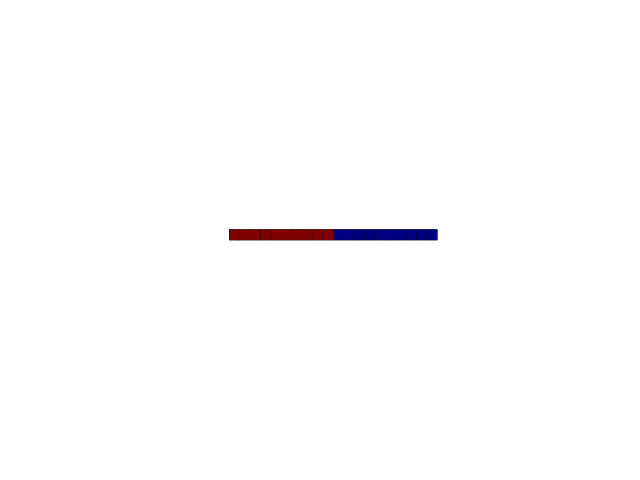

Time: 0.0
c_a: from 0.0 to 20.0118747931


In [10]:
sim.renderer.display("c_a")

# Simulation

Jacobian computation: started
Jacobian computation: finished (0.01 s)
Integration of the ODE system: 0.176466941833 seconds


<IPython.core.display.Javascript object>


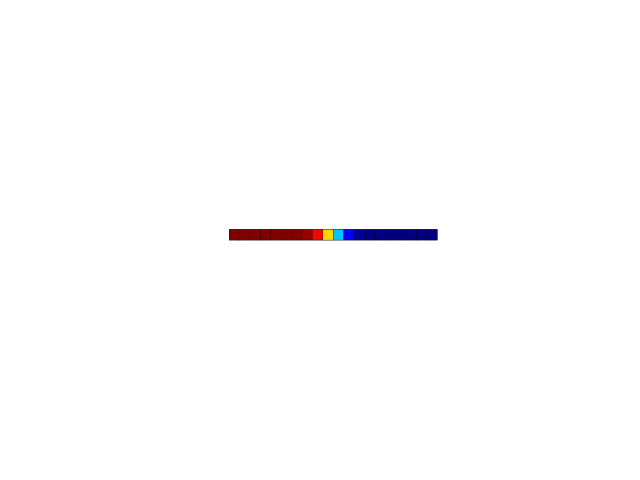

Time: 0.0078125
c_a: from 1.18257639573e-07 to 20.0021128986
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.110486984253 seconds


<IPython.core.display.Javascript object>


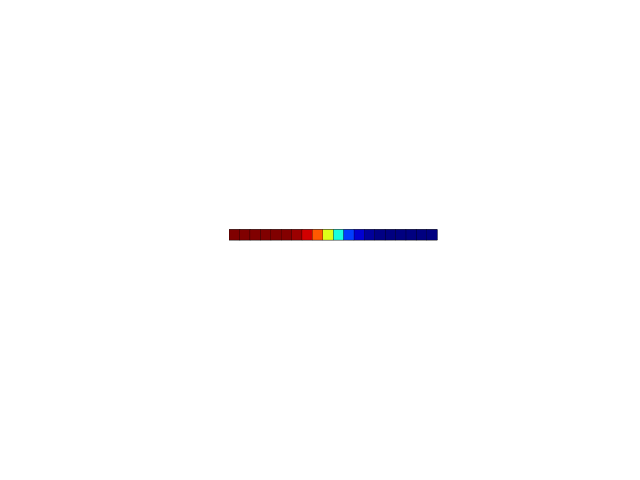

Time: 0.015625
c_a: from 3.40657828985e-05 to 20.0000588243
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.126778125763 seconds


<IPython.core.display.Javascript object>


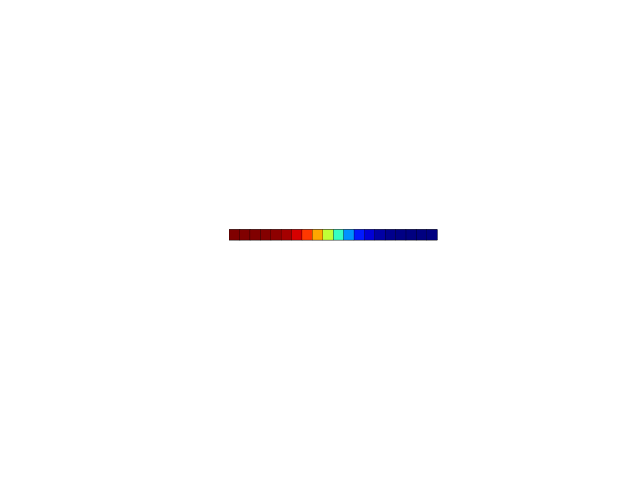

Time: 0.03125
c_a: from 0.00368617994698 to 19.9962604926
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.121808052063 seconds


<IPython.core.display.Javascript object>


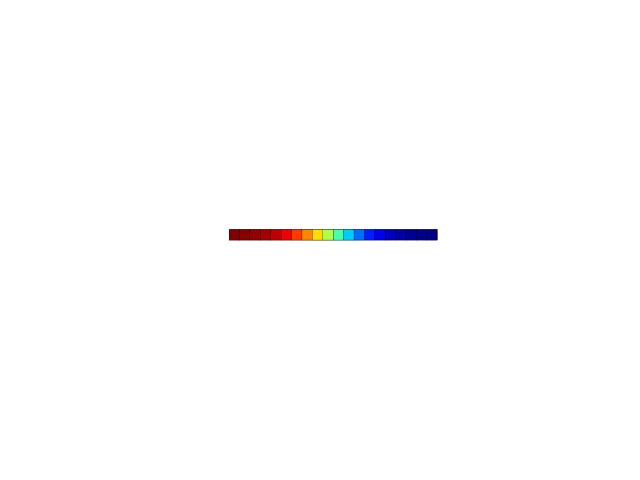

Time: 0.0625
c_a: from 0.106816638219 to 19.8936621765
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.0997447967529 seconds


<IPython.core.display.Javascript object>


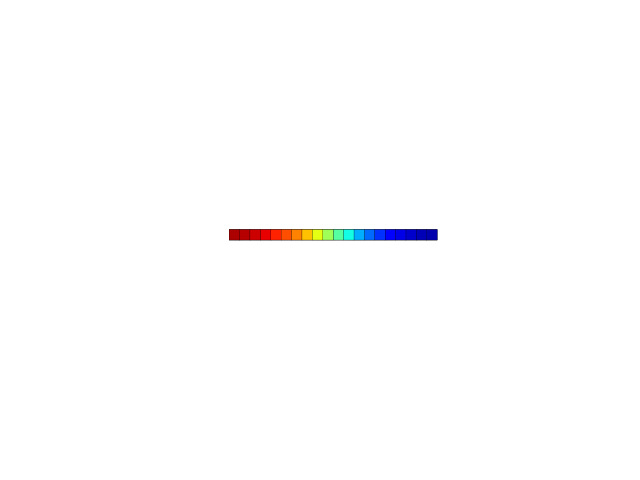

Time: 0.125
c_a: from 0.849957701303 to 19.1513450146
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.117565870285 seconds


<IPython.core.display.Javascript object>


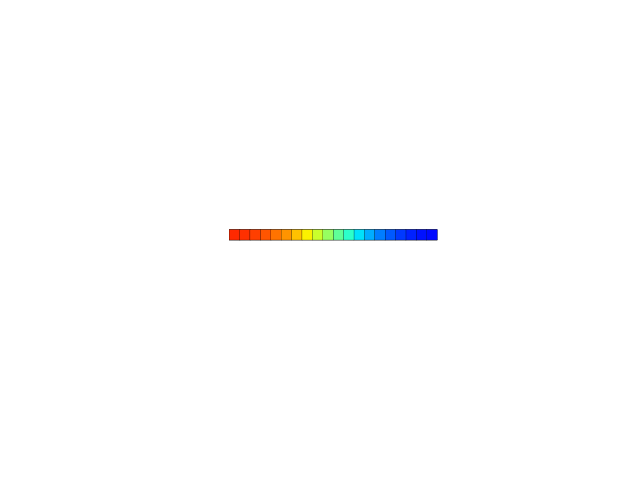

Time: 0.25
c_a: from 2.69390950807 to 17.3081514742
Jacobian computation: started
Jacobian computation: finished (0.01 s)
Integration of the ODE system: 0.124112129211 seconds


<IPython.core.display.Javascript object>


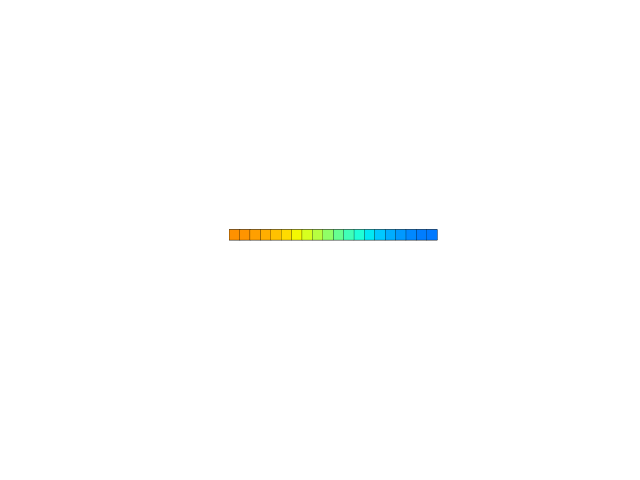

Time: 0.5
c_a: from 4.88327207986 to 15.1190060224
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.123478889465 seconds


<IPython.core.display.Javascript object>


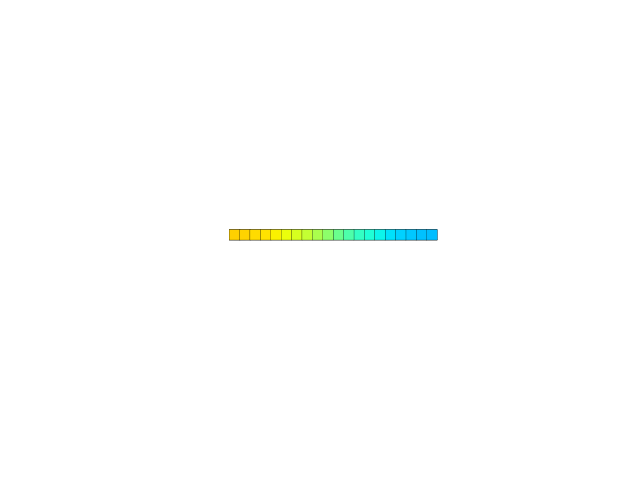

Time: 1.0
c_a: from 6.20010251653 to 13.8021370397
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.117352962494 seconds


<IPython.core.display.Javascript object>


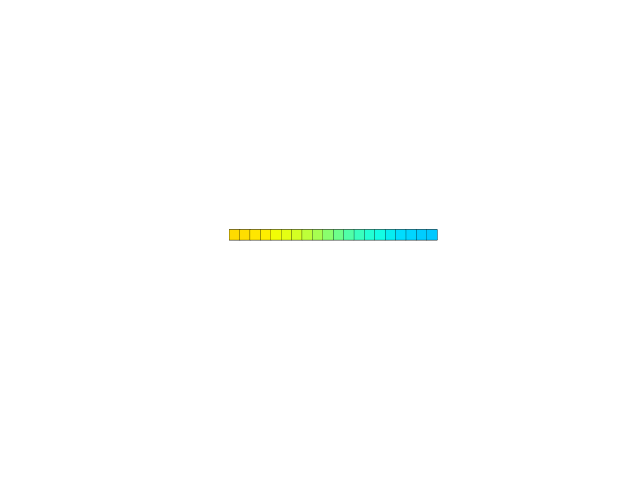

Time: 2.0
c_a: from 6.47459202975 to 13.52763463
Jacobian computation: started
Jacobian computation: finished (0.00 s)
Integration of the ODE system: 0.105368852615 seconds


<IPython.core.display.Javascript object>


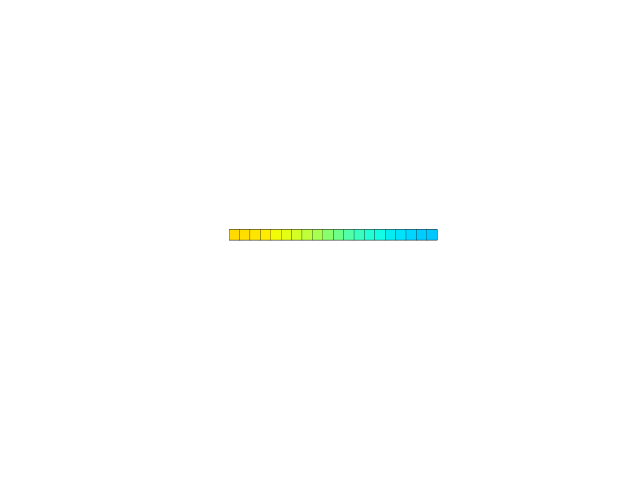

Time: 4.0
c_a: from 6.48346966315 to 13.5187565765


In [11]:
sim.simulate()

In this example, concentrations are no longer uniform at the steady state, as a result of the turnover of species `a`, which we introduced through the synthesis and degradation terms.

The competition between diffusion and turnover leads to the formation of concentration gradients around the source of the species. The steepness of the gradient depends on diffusion and turnover rates, relative to each other. The faster the diffusion and the slower the turnover, the smoother the gradient.

Changing the values of `D_a`, `A` and `mu_a` will affect the steady state. The `A` / `mu_a` ratio determines the total amount of `a` in the tissue. Increasing values of `A` and `mu_a` will increase the turnover rate, while increasing the value of `D_a` will increase the diffusion rate.